In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
%matplotlib inline

In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
#Data set

from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [7]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [10]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [47]:
from sklearn.model_selection import train_test_split
x_train_full, x_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)

In [48]:
x_train_full.shape, x_test.shape, y_train_full.shape, y_test.shape

((15480, 8), (5160, 8), (15480,), (5160,))

In [49]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train_full, y_train_full, random_state=42)

In [50]:
x_train.shape, x_valid.shape, y_train.shape, y_valid.shape

((11610, 8), (3870, 8), (11610,), (3870,))

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_valid = scaler.transform(x_valid)

In [52]:
np.random.seed(42)
tf.random.set_seed(42)

In [95]:
model = keras.models.Sequential()

In [96]:
model.add(keras.layers.Flatten(input_shape=[x_train.shape[1]]))
model.add(keras.layers.Dense(30, activation='relu'))
model.add(keras.layers.Dense(50, activation='relu'))
model.add(keras.layers.Dense(1))


In [97]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 8)                 0         
                                                                 
 dense_20 (Dense)            (None, 30)                270       
                                                                 
 dense_21 (Dense)            (None, 50)                1550      
                                                                 
 dense_22 (Dense)            (None, 1)                 51        
                                                                 
Total params: 1,871
Trainable params: 1,871
Non-trainable params: 0
_________________________________________________________________


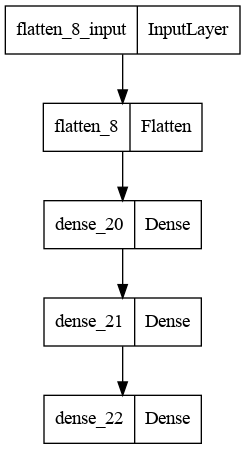

In [98]:
# import pydot
keras.utils.plot_model(model)

In [99]:
weight, biases = model.layers[1].get_weights()

In [100]:
weight

array([[-0.2663743 ,  0.12580469, -0.03174269, -0.18853778, -0.04952559,
        -0.03738245,  0.34863523, -0.17978948,  0.22269973,  0.22915664,
         0.15606102,  0.20489302,  0.09993413,  0.37976167, -0.1559322 ,
        -0.26271322,  0.3956459 ,  0.13865444, -0.08580956,  0.19559118,
        -0.31865162, -0.34100172, -0.14328885, -0.20369765, -0.13529724,
        -0.01582929,  0.31151113, -0.24153674, -0.08825576,  0.31472966],
       [ 0.0704748 , -0.12075722, -0.06604627,  0.39642432, -0.06533328,
        -0.2724644 , -0.20536616,  0.25310138,  0.03527132, -0.2265706 ,
        -0.38207287, -0.08891687, -0.37441105,  0.38333443, -0.00890791,
        -0.07928446,  0.09993449, -0.08710366, -0.26311538,  0.3748822 ,
         0.2424927 ,  0.17256466, -0.15594414, -0.2875156 , -0.38257176,
        -0.1747553 ,  0.3142846 , -0.290758  , -0.39374563,  0.0270907 ],
       [-0.24507216,  0.28648677, -0.06461298,  0.16612324,  0.1587781 ,
        -0.22188051, -0.32578027,  0.2650396 , -0

In [101]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [102]:
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.SGD(learning_rate=1e-3), metrics=['mae'])

In [103]:
model_history = model.fit(x_train, y_train, epochs=100, validation_data=(x_valid,y_valid))

Epoch 1/100
363/363 [==============================] - 2s 3ms/step - loss: 1.5839 - mae: 0.8735 - val_loss: 0.9639 - val_mae: 0.6182
Epoch 2/100
363/363 [==============================] - 1s 3ms/step - loss: 0.6653 - mae: 0.6013 - val_loss: 0.7399 - val_mae: 0.5842
Epoch 3/100
363/363 [==============================] - 1s 3ms/step - loss: 0.6157 - mae: 0.5748 - val_loss: 0.6408 - val_mae: 0.5556
Epoch 4/100
363/363 [==============================] - 1s 3ms/step - loss: 0.5782 - mae: 0.5546 - val_loss: 0.5459 - val_mae: 0.5414
Epoch 5/100
363/363 [==============================] - 1s 3ms/step - loss: 0.5493 - mae: 0.5389 - val_loss: 0.5101 - val_mae: 0.5204
Epoch 6/100
363/363 [==============================] - 1s 3ms/step - loss: 0.5246 - mae: 0.5260 - val_loss: 0.4929 - val_mae: 0.5088
Epoch 7/100
363/363 [==============================] - 1s 3ms/step - loss: 0.5050 - mae: 0.5149 - val_loss: 0.4764 - val_mae: 0.4982
Epoch 8/100
363/363 [==============================] - 1s 3ms/step - 

363/363 [==============================] - 1s 2ms/step - loss: 0.3457 - mae: 0.4142 - val_loss: 0.3547 - val_mae: 0.4073
Epoch 63/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3442 - mae: 0.4127 - val_loss: 0.3754 - val_mae: 0.4122
Epoch 64/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3446 - mae: 0.4133 - val_loss: 0.3308 - val_mae: 0.4044
Epoch 65/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3438 - mae: 0.4130 - val_loss: 0.3338 - val_mae: 0.4036
Epoch 66/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3431 - mae: 0.4121 - val_loss: 0.3546 - val_mae: 0.4059
Epoch 67/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3428 - mae: 0.4118 - val_loss: 0.3602 - val_mae: 0.4080
Epoch 68/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3421 - mae: 0.4112 - val_loss: 0.3544 - val_mae: 0.4059
Epoch 69/100
363/363 [==============================] - 1s 2ms/step - loss:

In [109]:
mae_test = model.evaluate(x_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3353 - mae: 0.4031


In [110]:
model_history.history

{'loss': [1.5839385986328125,
  0.6653323173522949,
  0.6157155632972717,
  0.5781546235084534,
  0.5492537617683411,
  0.524576723575592,
  0.5049964785575867,
  0.48872336745262146,
  0.4743315577507019,
  0.4622017443180084,
  0.4521423280239105,
  0.44304898381233215,
  0.4351901412010193,
  0.42801105976104736,
  0.42169466614723206,
  0.41598770022392273,
  0.4110965132713318,
  0.40661004185676575,
  0.4018367826938629,
  0.3983212113380432,
  0.3949549198150635,
  0.3917533755302429,
  0.3888070583343506,
  0.38605260848999023,
  0.3833979666233063,
  0.38135161995887756,
  0.3797018826007843,
  0.37749388813972473,
  0.3759061098098755,
  0.37392911314964294,
  0.37220463156700134,
  0.37039709091186523,
  0.3701215982437134,
  0.3681260049343109,
  0.36682748794555664,
  0.36590543389320374,
  0.36497291922569275,
  0.363537460565567,
  0.3623873293399811,
  0.36127737164497375,
  0.36073824763298035,
  0.3598144054412842,
  0.35846853256225586,
  0.3576301336288452,
  0.3571

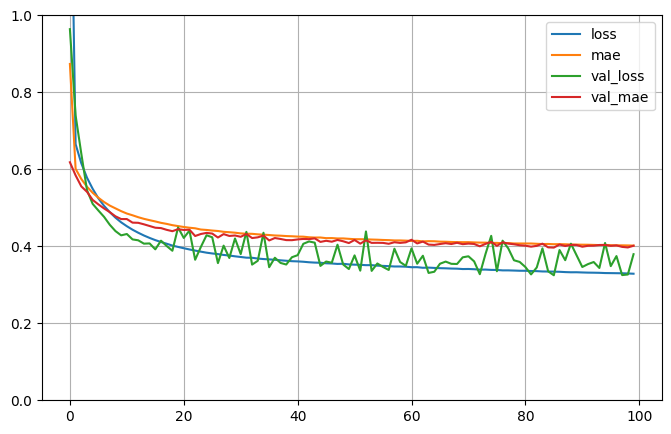

In [111]:
pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [112]:
x_new = x_test[:3]

In [113]:
y_pred = model.predict(x_new)
y_pred, y_test[:3]

1/1 [==============================] - 0s 169ms/step


(array([[0.56525743],
        [1.5453674 ],
        [4.3478403 ]], dtype=float32),
 array([0.477  , 0.458  , 5.00001]))

In [114]:
model.save('model.h5')